# Results visualization for Conjugate Gradient

This notebook is intended to show the obtained results for the MPI and CUDA implementation of the conjugate gradient algorithm. For the correct working of the code, please make sure that the results folder is filled with the necessary .txt files

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

ALPHA = 1 - 99.06 / 99.16
BETAS = [1-0.9838, 1-0.9858, 1-0.9881, 1-0.9907, 1-0.9929, 1-0.9947, 1-0.9957]

def show_hard_MPI_results():
    """
    Produces a plot for hard scaling speedup
    """
    
    
    folder = f'results'
    
    results_strong = {}

    with open(folder + f"/strong_scaling.txt") as f:
        for line in f:
            currentline = line.rstrip("\n").split(",")
            if int(currentline[0]) not in results_strong.keys():
                results_strong[int(currentline[0])] = [[int(currentline[1]), float(currentline[2])]]
            else:
                results_strong[int(currentline[0])].append([int(currentline[1]), float(currentline[2])])
            
    plt.figure()
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))

    for key in results_strong.keys():
        psizes = [results_strong[key][item][0] for item in range(len(results_strong[key]))]
        times = [results_strong[key][item][1] for item in range(len(results_strong[key]))]
        ax.loglog(psizes, times[0]/np.array(times), label=f"N = {key}", marker="o")
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.axvline(36, ymin=0, ymax=50, linestyle='--', color="black", label="p=36")
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xlabel("$p$", fontsize=30)
    ax.set_ylabel("$S_p$", fontsize=30)
    ax.set_xticks(psizes)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_title("Hard scaling speedup", fontsize=35)
    psizes = np.array(psizes)
    ax.plot(psizes, psizes, marker="x", label=f"Ideal")
    ax.legend(loc='upper left', ncol=1, fontsize=20)

    plt.show()
    
    
def show_weak_MPI_results():
    
    folder = f"results"
    
    ITEMS = 7
    
    plt.figure()
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    
    ax.xaxis.label.set_size(30)
    ax.yaxis.label.set_size(30)
    ax.set_ylim([0, 1.05])
    ax.axvline(36, ymin=0, ymax=1, linestyle='--', color="black", label="p=36")
            
    psizes = []
    times = []
    points = []
    with open(folder + f"/weak_scaling.txt") as f:
        for line in f:
            currentline = line.rstrip("\n").split(",")
            points.append(int(currentline[0]))
            psizes.append(int(currentline[1]))
            times.append(float(currentline[2]))
    
    for i in range(int(len(times) / ITEMS)):
        ax.semilogx(psizes[i*ITEMS:(i+1)*ITEMS], times[i*ITEMS]/(np.array(times[i*ITEMS:(i+1)*ITEMS])),
                    marker="o", label=f"$N_0 = {points[i*ITEMS]}$")
    ax.semilogx(psizes[:ITEMS], ((1-np.array(BETAS)) * np.array(psizes[:ITEMS]) + np.array(BETAS))/np.array(psizes[:ITEMS]),
                label=f"Gustafson's Bound", marker="x")
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xlabel("$p$", fontsize=30)
    ax.set_ylabel("$E_p$", fontsize=30)
    ax.set_xticks(psizes)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_title("Weak scaling efficiency", fontsize=35)
    ax.legend(loc='lower left', ncol=1, fontsize=20)

    plt.show()

    
    
def show_CUDA_results():
    """
    Produces a plot for CUDA results
    """
    
    threads = []
    times = []  
    times_T = []
    
    folder = f'results'
    with open(folder + f"/CUDA_NAIVE.txt") as f:
        for line in f:
            currentline = line.rstrip("\n").split(",")
            threads.append(int(currentline[0]))
            times.append(float(currentline[2]))
    
    folder = f'results'
    with open(folder + f"/CUDA_NAIVE_T.txt") as f:
        for line in f:
            currentline = line.rstrip("\n").split(",")
            times_T.append(float(currentline[2]))
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    fig.tight_layout()
    color = next(ax._get_lines.prop_cycler)['color']
    ax.semilogx(threads, times, marker="o", color=color, linestyle='dashed', label=f"$Ax$")
    ax.semilogx(threads, times_T, marker="o", color=color, label=f"$A^T x$")
    ax.set_xscale("log")
    ax.set_xticks(threads)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel("Threads per block", fontsize=30)
    ax.set_ylabel("Running time [s]", fontsize=30)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.legend(loc="best", fontsize=30, ncol=2)
    
    plt.show()
    
    results_T = {}
    threads = []
    times = []
    
    folder = f'results'
    with open(folder + f"/CUDA_T.txt") as f:
        for line in f:
            currentline = line.rstrip("\n").split(",")
            if int(currentline[1]) not in results_T.keys():
                results_T[int(currentline[1])] = [[int(currentline[0]), float(currentline[2])]]
            else:
                results_T[int(currentline[1])].append([int(currentline[0]), float(currentline[2])])
            
    fig, ax = plt.subplots(1, 1, figsize=(12, 7))
    fig.tight_layout()
    
    for key in results_T.keys():
        threads = [results_T[key][item][0] for item in range(len(results_T[key]))]
        times_T = [results_T[key][item][1] for item in range(len(results_T[key]))]
        ax.semilogx(threads, times_T, marker="o", label=f"BLOCK WIDTH = {key}")
        ax.set_xscale("log")
        ax.set_xticks(threads)
        ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel("Threads per block", fontsize=30)
    ax.set_ylabel("Running time [s]", fontsize=30)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.legend(loc="upper right", fontsize=20, ncol=1)
    
    plt.show()

### MPI

<Figure size 432x288 with 0 Axes>

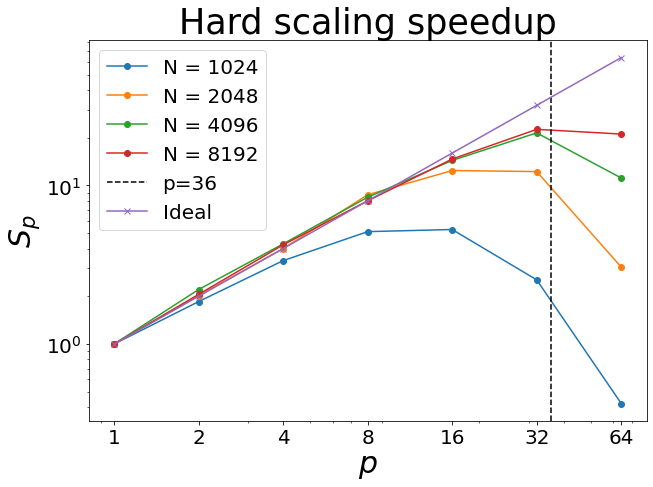

<Figure size 432x288 with 0 Axes>

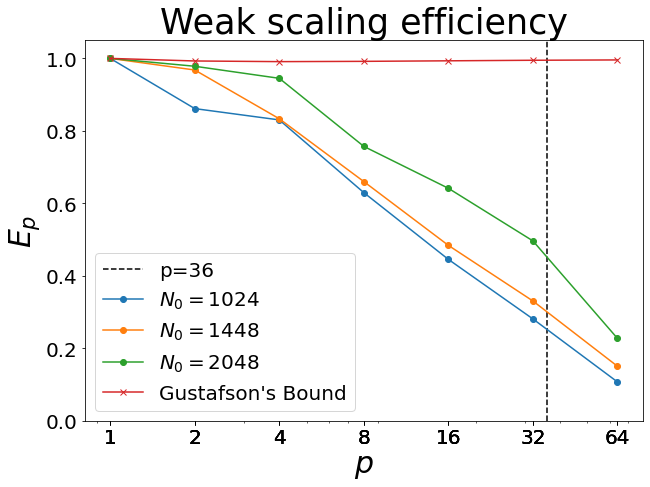

In [32]:
show_hard_MPI_results()
show_weak_MPI_results()

### CUDA

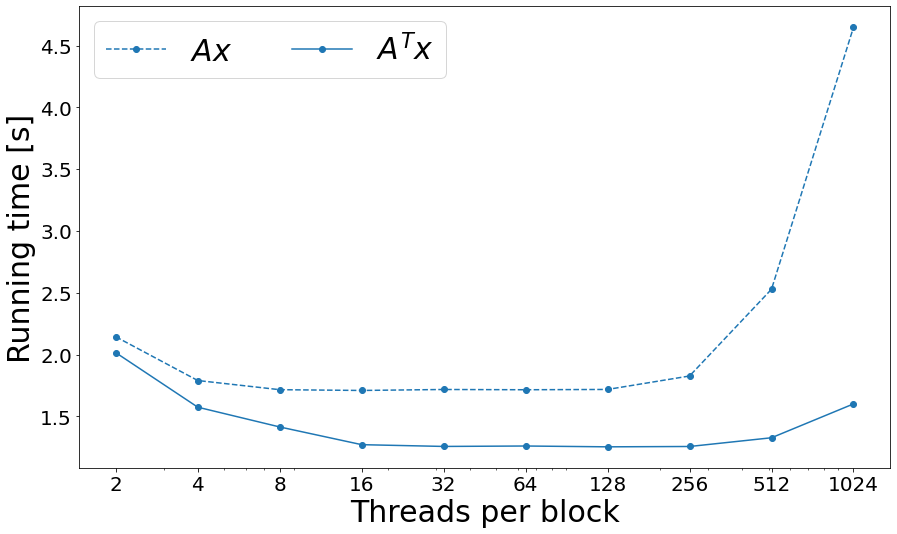

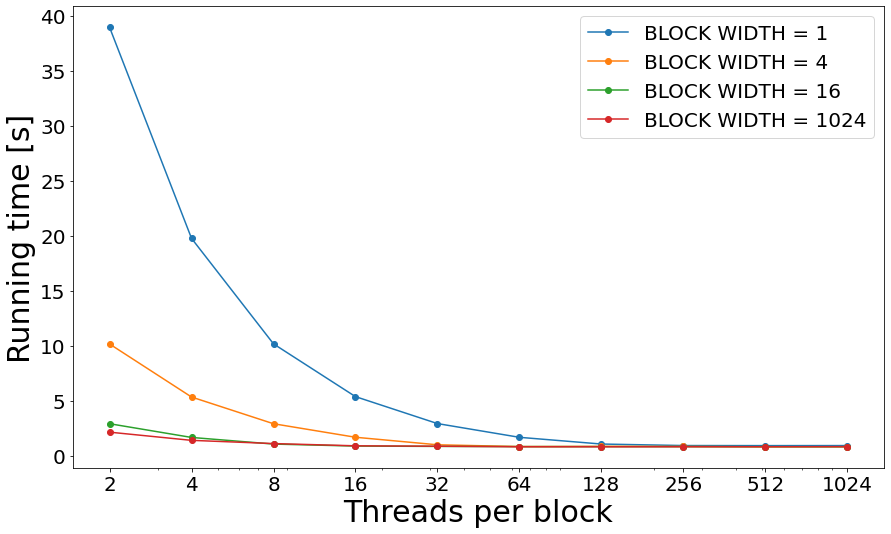

In [3]:
show_CUDA_results()    